## CNN with Tensorflow|Keras for Fashion MNIST


##  Content

### Introduction
### Load packages
### Read the data
### Data exploration
### Class distribution
### Images samples
### Model
### Prepare the model
### Train the model
### Test prediction accuracy
### Validation accuracy and loss
### Add Dropout layers to the model
### Re-train the model
### Check validation accuracy and loss with the new model
### Prediction accuracy with the new model
### Visualize the classified images
### Correctly classified images
### Incorrectly classified images
### Conclusions



In [1]:
#Load packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
import tensorflow.python.keras.utils 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


Using TensorFlow backend.


In [2]:

#Parameters

IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = False

import os

if(IS_LOCAL):
    PATH="./input/fashionmnist/"
else:
    PATH="./input/"
print(os.listdir(PATH))
['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']



['2243_9243_compressed_fashion-mnist_test.csv', '2243_9243_compressed_fashion-mnist_test.csv.zip', '2243_9243_compressed_fashion-mnist_train.csv', '2243_9243_compressed_fashion-mnist_train.csv.zip', '2243_9243_compressed_t10k-images-idx3-ubyte', '2243_9243_compressed_t10k-images-idx3-ubyte.zip', '2243_9243_compressed_train-images-idx3-ubyte.zip', 'datasets_2243_9243_t10k-labels-idx1-ubyte', 'datasets_2243_9243_train-labels-idx1-ubyte', 'fashion-mnist_test.csv', 'fashion-mnist_train.csv', 'fashionmnist']


['train-images-idx3-ubyte',
 'train-labels-idx1-ubyte',
 't10k-labels-idx1-ubyte',
 'fashion-mnist_train.csv',
 't10k-images-idx3-ubyte',
 'fashion-mnist_test.csv']

Read the data
There are 10 different classes of images, as following:

0: T-shirt/top;

1: Trouser;

2: Pullover;

3: Dress;

4: Coat;

5: Sandal;

6: Shirt;

7: Sneaker;

8: Bag;

9: Ankle boot.

Image dimmensions are 28x28.

The train set and test set are given in two separate datasets.



In [3]:
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)


In [4]:
## Data exploration
## The dimmension of the original train, test set are as following:

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])


Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [5]:
# Class distribution
# Let's see how many number of images are in each class. We start with the train set.

# Train set images class distribution

# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Ankle Boot          :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Coat                :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Trouser             :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%



### The classes are equaly distributed in the train set (10% each). 
### Let's also plot the class distribution.

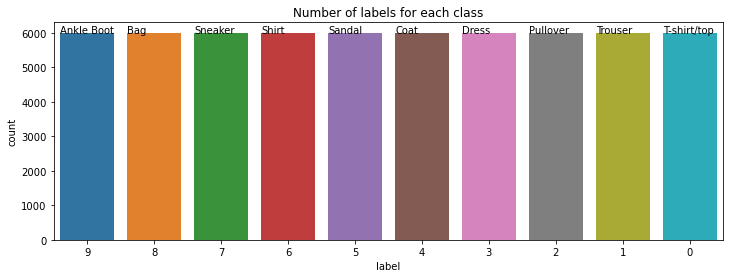

In [6]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

In [7]:
### Let's check the same for the test set.
## Test set images class distribution
get_classes_distribution(test_data)

Sneaker             :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Dress               :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Bag                 :   1000 or 10.0%
T-shirt/top         :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).

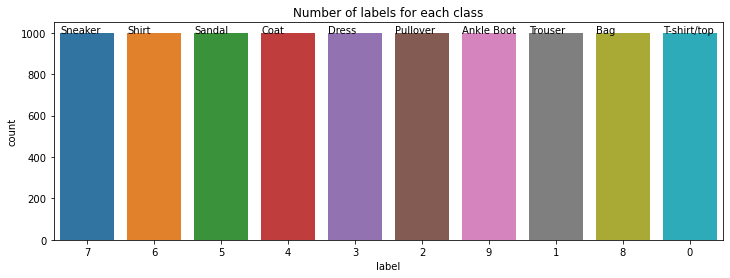

In [8]:
# Lets' also plot the class distribution.

plot_label_per_class(test_data)

## Sample images
### Train set images
### Let's plot some samples for the images.
### We add labels to the train set images, with the corresponding fashion item category.

In [9]:
def sample_images_data(data):
    # An empty list to colle### ct some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


#### Let's now plot the images.

#### The labels are shown above each image.



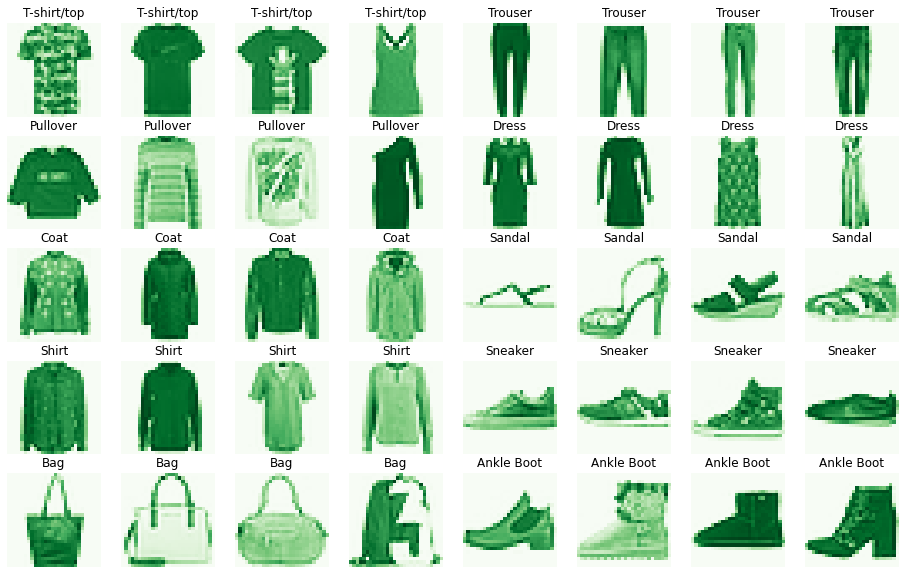

In [10]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")



Test set images

Let's plot now a selection of the test set images.

Labels are as well added (they are known).

Total number of sample images to plot:  40


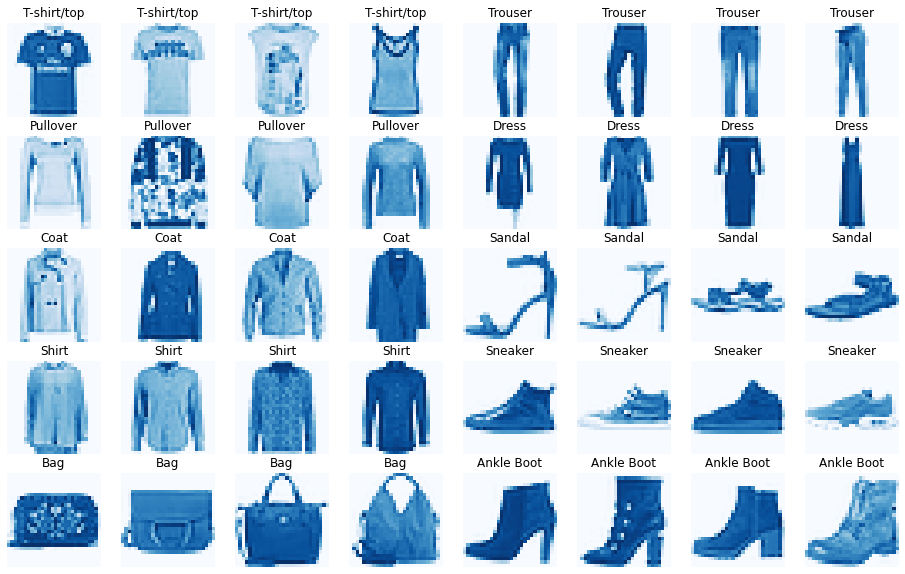

In [11]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)


## Data preprocessing

#### We reshape the columns from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [12]:
def data_preprocessing(raw):
    out_y = tensorflow.keras.utils.to_categorical (raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

#### We process both the train_data and the test_data

In [13]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)
X.shape

(60000, 28, 28, 1)

#### Split train in train and validation set
#### We further split the train set in train and validation set. 
#### The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# The dimmension of the processed train, validation and test set are as following:

print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])


Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


## Let's check the class inbalance for the resulted training set.

In [15]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")
    
    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
        
    plt.show()  

In [16]:
def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))
    


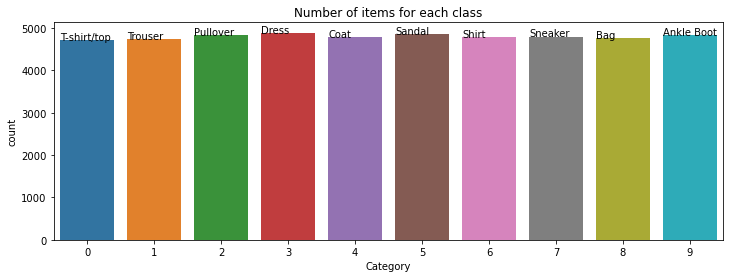

Dress               :   4891 or 10.189583333333333%
Sandal              :   4855 or 10.114583333333334%
Pullover            :   4836 or 10.075000000000001%
Ankle Boot          :   4827 or 10.05625%
Sneaker             :   4798 or 9.995833333333334%
Coat                :   4796 or 9.991666666666667%
Shirt               :   4779 or 9.95625%
Bag                 :   4757 or 9.910416666666666%
Trouser             :   4745 or 9.885416666666668%
T-shirt/top         :   4716 or 9.825000000000001%


In [17]:
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

#### And, as well, for the validation set.


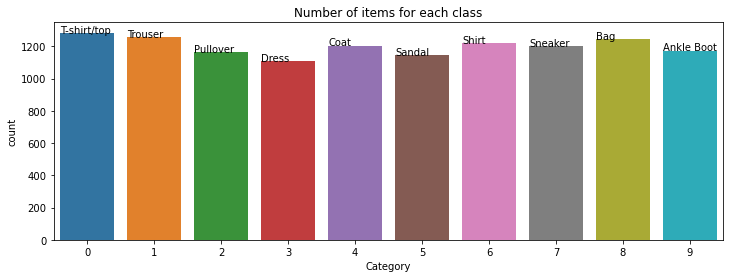

T-shirt/top         :   1284 or 10.7%
Trouser             :   1255 or 10.458333333333334%
Bag                 :   1243 or 10.358333333333333%
Shirt               :   1221 or 10.174999999999999%
Coat                :   1204 or 10.033333333333333%
Sneaker             :   1202 or 10.016666666666667%
Ankle Boot          :   1173 or 9.775%
Pullover            :   1164 or 9.700000000000001%
Sandal              :   1145 or 9.541666666666666%
Dress               :   1109 or 9.241666666666665%


In [18]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))



#### Both the train and validation set are unbalanced with respect of distribution of classes.

## Train the model
### Build the model

#### We will use a Sequential model.

The Sequential model is a linear stack of layers. 
It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

For activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)

Then we compile the model, specifying as well the following parameters:

1.loss;
2.optimizer;
3.metrics.


In [19]:
# Model
model = Sequential()

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Run the model
#### We run the model with the training set. 
#### We are also using the validation set (a subset from the orginal training set) for validation.


In [21]:

train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6050 - accuracy: 0.7939 - val_loss: 0.4696 - val_accuracy: 0.8336
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4316 - accuracy: 0.8499 - val_loss: 0.4731 - val_accuracy: 0.8376
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3878 - accuracy: 0.8630 - val_loss: 0.3896 - val_accuracy: 0.8577
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3650 - accuracy: 0.8701 - val_loss: 0.4102 - val_accuracy: 0.8565
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3424 - accuracy: 0.8773 - val_loss: 0.3671 - val_accuracy: 0.8665
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3247 - accuracy: 0.8840 - val_loss: 0.3584 - val_accuracy: 0.8710
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3102 - accuracy: 0.8894 - val_loss: 0.3350 - val_accuracy: 0.8785
Epoch 

## Test prediction accuracy
#### We calculate the test loss and accuracy.

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3846653401851654
Test accuracy: 0.8907999992370605


In [24]:
## Changing the  Dense parameters

model1 = Sequential()

model1 = Sequential() 
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(200, activation="relu"))
model1.add(Dense(10, activation="softmax"))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [25]:

train_model1 = model1.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5635 - accuracy: 0.8061 - val_loss: 0.4592 - val_accuracy: 0.8367
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4124 - accuracy: 0.8550 - val_loss: 0.3888 - val_accuracy: 0.8628
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3678 - accuracy: 0.8706 - val_loss: 0.3773 - val_accuracy: 0.8673
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3415 - accuracy: 0.8780 - val_loss: 0.3615 - val_accuracy: 0.8707
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3222 - accuracy: 0.8835 - val_loss: 0.3328 - val_accuracy: 0.8833
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3078 - accuracy: 0.8899 - val_loss: 0.3436 - val_accuracy: 0.8786
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2900 - accuracy: 0.8950 - val_loss: 0.3324 - val_accuracy: 0.8832
Epoch 

In [36]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3887470066547394
Test accuracy: 0.8984000086784363


#### Test accuracy is around 0.89.

#### We evaluated the model accuracy based on the predicted values for the test set. 
#### Let's check the validation value during training.

## Validation accuracy and loss



In [26]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
y_true = np.array(test_data.iloc[:, 0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
type(y_true)

numpy.ndarray

In [28]:
#get the indices to be plotted

p = predicted_classes[:10000]
y = y_true[:10000]


In [29]:
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [30]:
correct.shape[0]

8908

In [31]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8908
Incorrect predicted classes: 1092


In [32]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.81      0.87      0.84      1000
    Class 1 (Trouser) :       0.98      0.98      0.98      1000
   Class 2 (Pullover) :       0.80      0.81      0.81      1000
      Class 3 (Dress) :       0.92      0.89      0.90      1000
       Class 4 (Coat) :       0.79      0.88      0.84      1000
     Class 5 (Sandal) :       0.97      0.95      0.96      1000
      Class 6 (Shirt) :       0.79      0.64      0.71      1000
    Class 7 (Sneaker) :       0.93      0.96      0.94      1000
        Class 8 (Bag) :       0.96      0.98      0.97      1000
 Class 9 (Ankle Boot) :       0.96      0.95      0.95      1000

               accuracy                           0.89     10000
              macro avg       0.89      0.89      0.89     10000
           weighted avg       0.89      0.89      0.89     10000



#### The best accuracy is obtained for Class 1, Class 5, Class 8, Class 9 and Class 7. 
#### Worst accuracy is for Class 6.

#### The recall is highest for Class 8, Class 5 and smallest for Class 6 and Class 4.

#### f1-score is highest for Class 1, Class 5 and Class 8 
#### smallest for Class 6 followed by Class 4 and Class 2.

## Visualize classified images
#### Correctly classified images

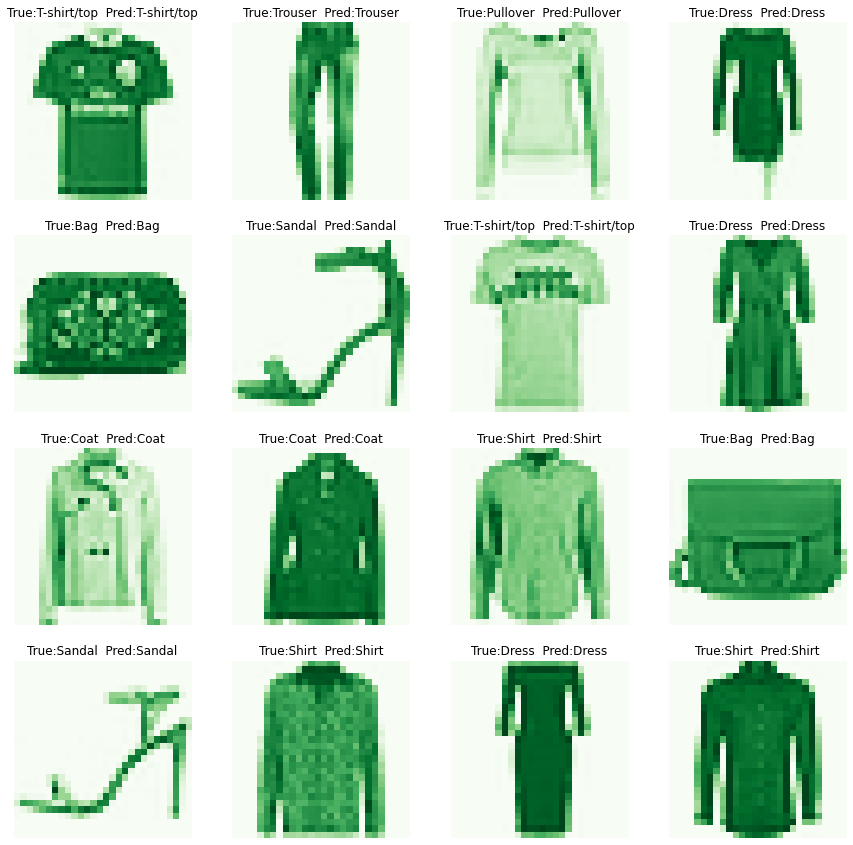

In [33]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

#### Incorrectly classified images

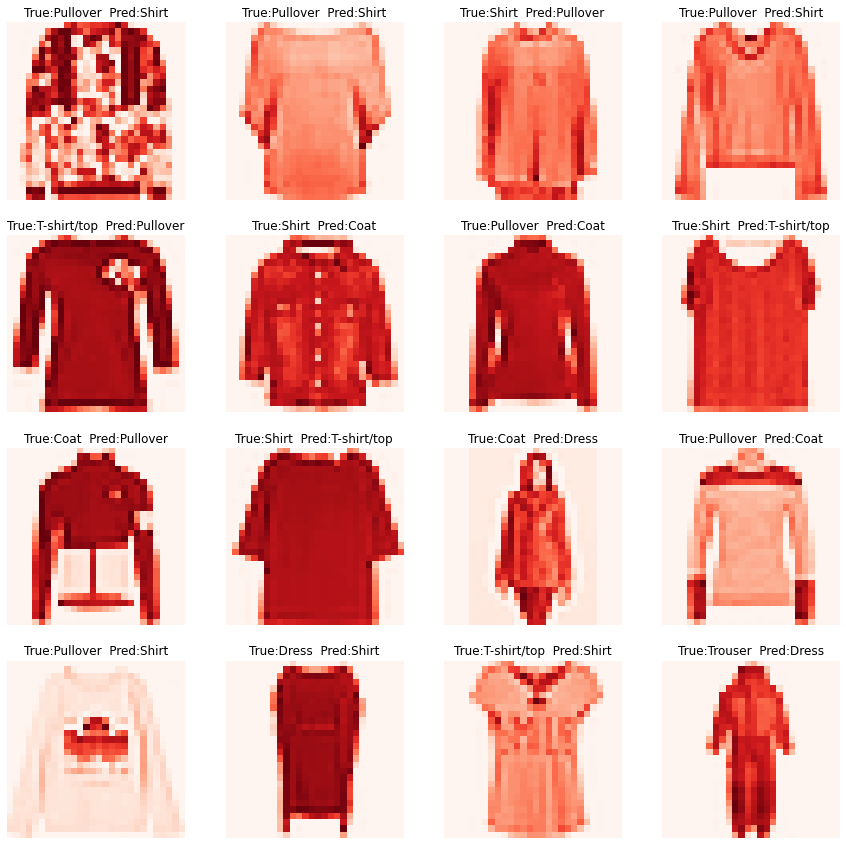

In [34]:
plot_images(incorrect, "Reds")


## Conclusions ::
With a sequential model for the training, 
we obtained an accuracy ~0.90 for test prediction. 

We retrained the model with more accuracy.

Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover).

